# 590010251
# Laksh Jain
# Pattern Recognition Lab
# Experiment 3

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [36]:
df = pd.read_csv("netflix_titles.csv")

### Explolatory Data Analysis

In [37]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [38]:
df.shape

(8807, 12)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [40]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [41]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Handling Missing Values

In [42]:
# filling director with "Unknown"
df['director'].fillna('Unknown', inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11452\3029224429.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)


In [43]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [44]:
# because cast is multi-valued attribute and it's not that important to the movie type, we drop it
df = df.drop(columns=['cast'])

In [45]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [46]:
# we remove country and date added columns too because they are also un-important to the movie type
df = df.drop(columns=['country', 'date_added'])

In [47]:
df.head()

,show_id,type,title,director,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [48]:
# now we remove all the attributes thatare not that necessary to the movie type
df = df.drop(columns=['show_id', 'description'])

In [49]:
df.head()

,type,title,director,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,Unknown,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,Unknown,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


### Encoding Categorical Data

In [50]:
# handling the listed_in column because it's multivalued

from sklearn.preprocessing import MultiLabelBinarizer

# Converting the column to a list of lists
df['listed_in'] = df['listed_in'].str.split(', ')

# Applying MultiLabelBinarizer
mlb = MultiLabelBinarizer()
encoded_tags = mlb.fit_transform(df['listed_in'])

# Creating a DataFrame of the encoded data
encoded_tags_df = pd.DataFrame(encoded_tags, columns=mlb.classes_)

# Concatenating with the original data
df = pd.concat([df, encoded_tags_df], axis=1)
df = df.drop(columns=['listed_in'])  # Dropping the original column


In [51]:
df.head()

,type,title,director,release_year,rating,duration,Action & Adventure,Anime Features,Anime Series,British TV Shows,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,2020,PG-13,90 min,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TV Show,Blood & Water,Unknown,2021,TV-MA,2 Seasons,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,1 Season,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,TV Show,Jailbirds New Orleans,Unknown,2021,TV-MA,1 Season,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TV Show,Kota Factory,Unknown,2021,TV-MA,2 Seasons,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [52]:
X = df.drop(columns=['type'])
y = df['type']

In [53]:
X = pd.get_dummies(X, drop_first=True)

In [54]:
X.head()

,release_year,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,...,duration_90 min,duration_91 min,duration_92 min,duration_93 min,duration_94 min,duration_95 min,duration_96 min,duration_97 min,duration_98 min,duration_99 min
0,2020,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
1,2021,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,2021,0,0,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
3,2021,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,2021,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


### Splitting Dataset

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [57]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

### Classification Metrics

In [62]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

TPR = tp / (tp + fn)  # True Positive Rate
FPR = fp / (fp + tn)  # False Positive Rate
TNR = tn / (tn + fp)  # True Negative Rate
FNR = fn / (fn + tp)  # False Negative Rate

recall = TPR  # Same as Sensitivity
precision = tp / (tp + fp)

print("Confusion Matrix:\n", cm)
print("\n")
print(f"TPR (Recall/Sensitivity): {TPR:.2f}")
print(f"FPR: {FPR:.2f}")
print(f"TNR: {TNR:.2f}")
print(f"FNR: {FNR:.2f}")
print(f"Precision: {precision:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1836    0]
 [   2  805]]


TPR (Recall/Sensitivity): 1.00
FPR: 0.00
TNR: 1.00
FNR: 0.00
Precision: 1.00

Classification Report:
               precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1836
     TV Show       1.00      1.00      1.00       807

    accuracy                           1.00      2643
   macro avg       1.00      1.00      1.00      2643
weighted avg       1.00      1.00      1.00      2643



### ROC-AUC Curve

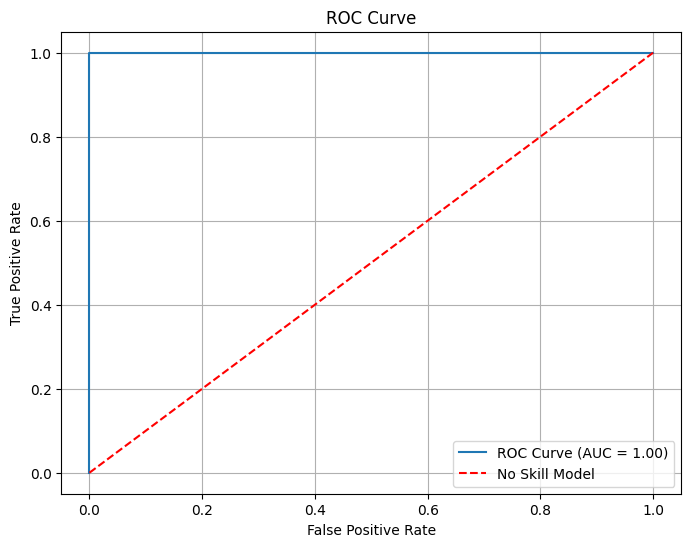

ROC-AUC Score: 1.00


In [65]:
from sklearn.preprocessing import LabelEncoder

# Encoding y_true (y_test)
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # This will map categories to integers


fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "r--", label="No Skill Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

print(f"ROC-AUC Score: {roc_auc:.2f}")